# Analysis of US Coastguard GPS disruption data

## Prerequisites

In [1]:
import pandas as pd
from datetime import datetime as dt

In [4]:
%pip install lxml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.1 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Webscrape
Run this to webscrape the data to file. If you already have the data locally, skip the following cell

In [2]:
table_list = pd.read_html(r'https://navcen.uscg.gov/gps-problem-report-status')
table_list[0].to_csv('gps_navcen.csv',index=False)

## Processing and Analysis

In [3]:
gps_disruption_df=pd.read_csv('gps_navcen.csv')

In [4]:
gps_disruption_df.head()

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date
0,10/16/2022 14:13:00 CST,Independence,Automobile,USER: My mapping services are constantly searc...,Mapping Issue,10/25/2022
1,10/06/2022 09:15:00 CST,"Dallas, TX by Southern Methodist University",Other,"USER: For several years now, on and off throug...",Insufficient Information,10/25/2022
2,09/17/2022 13:00:00 EST,"Navy Yard, Washington DC",None,USER: Our car navigation system and our mobile...,Insufficient Information,10/25/2022
3,09/10/2022 09:45:00 CST,Chicago,Automobile,USER: Both my standalone gps and phone gps rep...,Insufficient Information,10/25/2022
4,09/07/2022 13:15:00 EST,"I-20 near Columbia, SC",Automobile,"USER: Several times, most recently yesterday, ...",Mapping Issue,09/13/2022


## Analyse disruptions by date

In [5]:
gps_disruption_df['local_date']=gps_disruption_df['Disruption Date/Time']\
.apply(lambda x:dt.strptime(x[0:10],'%m/%d/%Y'))

<AxesSubplot: xlabel='local_date'>

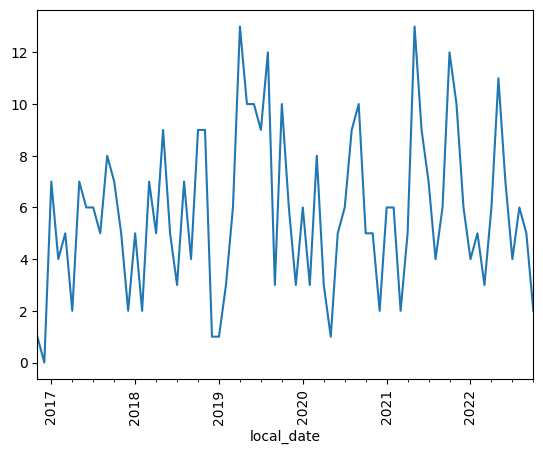

In [6]:
gps_disruption_df.resample('M', on='local_date').\
count()['Disruption Date/Time'].plot(rot=90)


## Analyse disruptions by location

In [7]:
gps_disruption_df['location_clean']=gps_disruption_df['Location'].\
apply(lambda x:x.split(',')[-1].strip().upper())
gps_disruption_df['location_clean_group_len']=gps_disruption_df['location_clean']\
.apply(lambda x: len(x))
gps_disruption_df['location_clean2']=gps_disruption_df['location_clean']


In [8]:
gps_disruption_df[gps_disruption_df['location_clean_group_len']==2]['location_clean'].unique()

array(['SC', 'CA', 'MA', 'NV', 'DC', 'OR', 'AR', 'SD', 'ND', 'UK', 'VA',
       'WA', 'TX', 'NM', 'IA', 'CO', 'FL', 'CT', 'MD', 'AZ', 'NC', 'IN',
       'NY', 'TN', 'OH', 'PA', 'AK', 'GA', 'NJ', 'OK', 'LA'], dtype=object)

In [9]:
gps_disruption_df

,Disruption Date/Time,Location,Type,Description,Cause,Closed Date,local_date,location_clean,location_clean_group_len,location_clean2
0,10/16/2022 14:13:00 CST,Independence,Automobile,USER: My mapping services are constantly searc...,Mapping Issue,10/25/2022,2022-10-16,INDEPENDENCE,12,INDEPENDENCE
1,10/06/2022 09:15:00 CST,"Dallas, TX by Southern Methodist University",Other,"USER: For several years now, on and off throug...",Insufficient Information,10/25/2022,2022-10-06,TX BY SOUTHERN METHODIST UNIVERSITY,35,TX BY SOUTHERN METHODIST UNIVERSITY
2,09/17/2022 13:00:00 EST,"Navy Yard, Washington DC",None,USER: Our car navigation system and our mobile...,Insufficient Information,10/25/2022,2022-09-17,WASHINGTON DC,13,WASHINGTON DC
3,09/10/2022 09:45:00 CST,Chicago,Automobile,USER: Both my standalone gps and phone gps rep...,Insufficient Information,10/25/2022,2022-09-10,CHICAGO,7,CHICAGO
4,09/07/2022 13:15:00 EST,"I-20 near Columbia, SC",Automobile,"USER: Several times, most recently yesterday, ...",Mapping Issue,09/13/2022,2022-09-07,SC,2,SC
...,...,...,...,...,...,...,...,...,...,...
414,01/05/2017 4:35 UTC,Chile,Law Enforcement,User: There were large spikes in geozone alarm...,User Equipment,05/20/2019,2017-01-05,CHILE,5,CHILE
415,01/03/2017 11:AM CST,San Angelo Airport,Aviation,User: The GPS systems in normal mode not milit...,Unintentional Interference,05/20/2019,2017-01-03,SAN ANGELO AIRPORT,18,SAN ANGELO AIRPORT
416,01/02/2017 3:00 EST,North Carolina - South Carolina border,Transportation,User: GPS would say when you plug in that ther...,User Equipment,05/20/2019,2017-01-02,NORTH CAROLINA - SOUTH CAROLINA BORDER,38,NORTH CAROLINA - SOUTH CAROLINA BORDER
417,01/01/2017 12:00 EST,"Elizabeth, NJ",Transportation,"User: My business is located in Elizabeth, NJ....",Mapping Issue,05/20/2019,2017-01-01,NJ,2,NJ


In [10]:
disruptions_by_location=gps_disruption_df[gps_disruption_df['location_clean_group_len']!=2].groupby('location_clean2').count()['Disruption Date/Time']


In [13]:
disruptions_by_location[disruptions_by_location>1]#.plot(kind='barh')

location_clean2
ALABAMA                    2
ALASKA                     2
AT SEA                     2
BRAZIL                     5
CALIFORNIA                 3
CHINA                      4
CYPRUS                     6
EAST MEDITERRANEAN SEA     2
EAST OF MALTA              3
EASTERN MEDITERRANEAN      2
EGYPT                     23
FINLAND                    2
FLORIDA                    4
GERMANY                    3
GLOBAL                     4
GREECE                     3
INDIA                      2
IRAN                       2
ISRAEL                     3
ISTANBUL                   2
ITALY                      6
LEBANON                    4
LIBYA                      3
LIMASSOL                   9
MEDITERRANEAN SEA          2
NEW YORK                   2
OREGON                     2
PRC                        2
SAUDI ARABIA               3
SPAIN                      3
SUEZ CANAL                 2
TEXAS                      2
TURKEY                     2
UNITED STATES              

In [15]:
gps_disruption_df.query('Location in ("Worldwide","Global","At sea")')[['local_date','Location','Description','Cause']]

,local_date,Location,Description,Cause
91,2021-07-28,At sea,USER: The vessel was sailing towards port said...,Unknown Interference
138,2021-01-16,Global,CNES has detected a repetition of IODE for PRN...,IODC_10-Bit
169,2020-08-04,Global,User: CNES (Centre National d Etudes Spatiales...,ICD_Violation
195,2020-02-12,Worldwide,"User: In February 2020 (Feb 12th, 13th, 15th a...",ICD_Violation
286,2019-02-01,Global,User: Thanks to Navigation and Timing Monitori...,None
356,2017-11-30,Global,User: GPS PRN22 orbit error started to wander ...,User Equipment
372,2017-09-20,Worldwide,User: It appears that the Subframe-2 IODC mess...,User Equipment


<AxesSubplot: ylabel='location_clean2'>

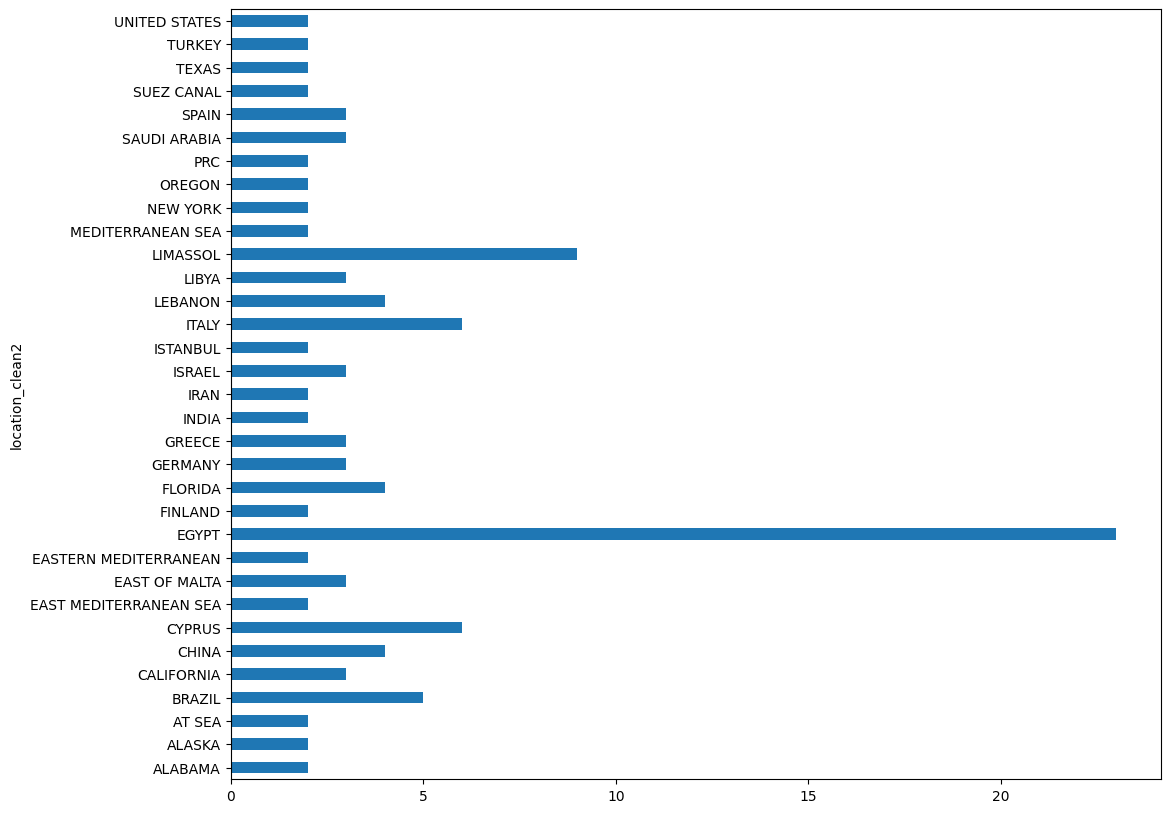

In [16]:
#def group_locations(string_x):
#    if string_x==''

disruptions_by_location[disruptions_by_location>1 ].drop(['WORLDWIDE','GLOBAL'])\
.plot(kind='barh',figsize=[12,10])

In [17]:
gps_disruption_df\
.query('location_clean2 in ("MEDITERRANEAN SEA","EASTERN MEDITERRANEAN","EAST MEDITERRANEAN SEA")')\
[['Location','Description']]

,Location,Description
110,East Mediterranean Sea,User indicated an intermittent problem that wa...
120,Eastern Mediterranean,USER: roughly 12 hours of gps spoofing upon de...
123,East Mediterranean Sea,Lost GPS signal for six-minutes from 1620 GMT ...
124,Eastern Mediterranean,"GPS jamming begins, affecting both GPS units. ..."
152,Mediterranean Sea,User: Additional vessel in area were experienc...
154,Mediterranean Sea,User: Intermittent GPS signal beginning at 013...


In [18]:
for description_str in gps_disruption_df.loc[90:95,'Description']:
    print(description_str)

USER: At 0300LT while getting underway from anchorage C-3, North Anchorage, Port Said, Egypt the vessel lost DGPS signal due to heavy Interference. We have two units on board. DGPS#2 regained signal after a couple of minutes while DGPS unit #1 had to be factory reset and rebooted several times before it was able to acquire satellites later in the day. Is this a common occurrence in the Suez Canal or was just an anomaly? The Suez canal Pilots said it is a common occurrence in the canal. NAVCEN: The GPS Operations Center reviewed the GPS Constellation and Control Segment, there are no known anomalies that might affect GPS signal integrity at the time and vicinity of the reported problem. Space weather was reviewed and found unlikely to have impacted GPS performance. There were no authorized GPS tests in the area. No correlating reports from interagency partners. The report of interference is similar to that outlined by U.S. Maritime Administration in Maritime Advisory 2021-004-Various GP